In [21]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy as sp
import statsmodels.formula.api as smf
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## 회귀분석

In [2]:
w = pd.read_csv('../../data/chick004.csv')
w

,chick_nm,weight,egg_weight,movement,food
0,a01,140,65,146,14
1,a02,128,62,153,12
2,a03,140,65,118,13
3,a04,135,65,157,13
4,a05,145,69,157,13
5,a06,138,65,143,13
6,a07,125,61,110,11
7,a08,148,69,159,15
8,a09,133,64,133,11
9,a10,145,69,174,13


In [3]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chick_nm    30 non-null     object
 1   weight      30 non-null     int64 
 2   egg_weight  30 non-null     int64 
 3   movement    30 non-null     int64 
 4   food        30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [4]:
w2 = w.iloc[:, 1:5]
w2

,weight,egg_weight,movement,food
0,140,65,146,14
1,128,62,153,12
2,140,65,118,13
3,135,65,157,13
4,145,69,157,13
5,138,65,143,13
6,125,61,110,11
7,148,69,159,15
8,133,64,133,11
9,145,69,174,13


## statsmodels라이브러리의 OLS 이용한 단순회귀분석

In [7]:
## 1. 모델 구축
# weight:종속변수,  egg-weight:독립변수,  단순선형회귀모델 구축
model_lm = smf.ols(formula = 'weight ~ egg_weight', data = w2)

In [8]:
## 2. 모델 학습
result_lm = model_lm.fit()

In [9]:
## 3. 모델 결과 확인
result_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     306.0
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.32e-16
Time:                        18:53:41   Log-Likelihood:                -63.148
No. Observations:                  30   AIC:                             130.3
Df Residuals:                      28   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5475      8.705     -1.671      0.106     -32.380       3.285
egg_weight     2.3371      0.134     17.493      0.000       2.063       2.611
==============================================================================
Omnibus:                       15.078   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                2.750
Skew:                           0.032   Prob(JB):                        0.253
Kurtosis:                       1.518   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

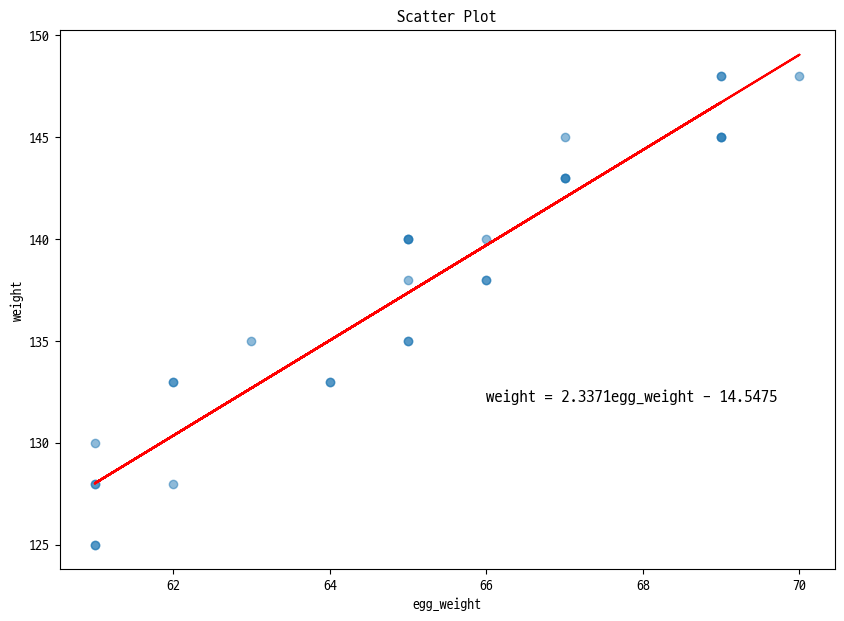

In [10]:
plt.figure(figsize = (10,7))

plt.scatter(w.egg_weight, w.weight, alpha = .5)
plt.plot(w.egg_weight, w.egg_weight*2.3371 - 14.5475, color = 'red')

plt.text(66, 132, 'weight = 2.3371egg_weight - 14.5475', fontsize = 12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.show()

## sklearn 라이브러리  LinearRegression 이용한 단순회귀분석

In [13]:
x = w2[['egg_weight']]   ## 독립변수
y = w2['weight']         ## 종속변수

In [14]:
## 1.모델 구축 (생성)
model = LinearRegression()

In [15]:
## 2.모델 학습
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
## 3.예측 실행
y_pred = model.predict(x)
y_pred

array([137.36628644, 130.35487959, 137.36628644, 137.36628644,
       146.7148289 , 137.36628644, 128.01774398, 146.7148289 ,
       135.02915082, 146.7148289 , 142.04055767, 128.01774398,
       130.35487959, 142.04055767, 146.7148289 , 128.01774398,
       149.05196451, 128.01774398, 142.04055767, 146.7148289 ,
       128.01774398, 135.02915082, 139.70342205, 142.04055767,
       137.36628644, 139.70342205, 137.36628644, 139.70342205,
       130.35487959, 132.69201521])

In [17]:
x2 = np.array([55,44,58,61,72,68]).reshape(-1, 1)
model.predict(x2)

array([113.99493029,  88.28643853, 121.00633714, 128.01774398,
       153.72623574, 144.37769328])

In [18]:
## 모델 결과
coef = model.coef_[0]  # 회귀계수 (기울기)
intercept = model.intercept_  # 절편
print(f"회귀식: weight = {coef:.4f} * egg_weight + {intercept:.4f}")

회귀식: weight = 2.3371 * egg_weight + -14.5475


In [22]:
r2 = r2_score(y, y_pred)
print(f"결정계수 : {r2}")

결정계수 : 0.9161730598449773


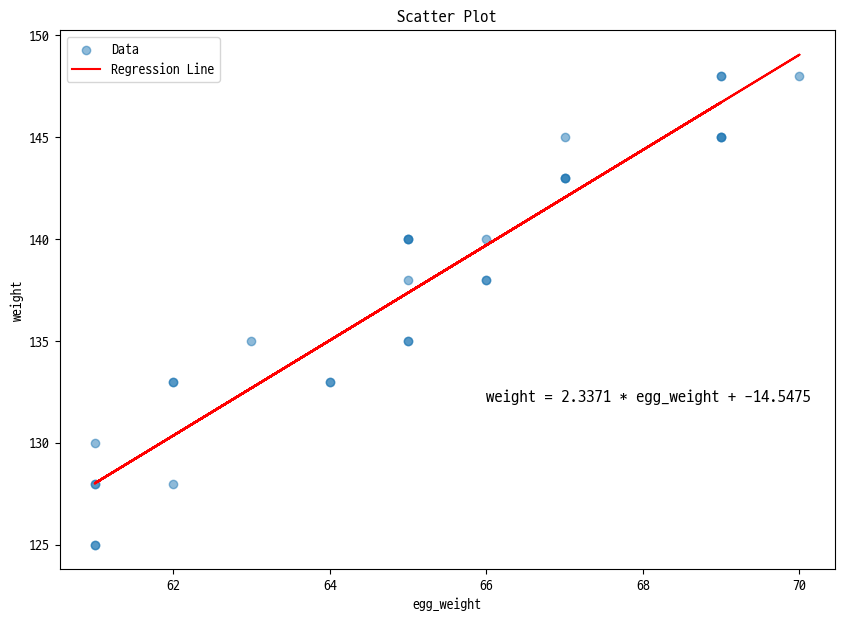

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(w2['egg_weight'], w2['weight'], alpha=0.5, label='Data')
plt.plot(w2['egg_weight'], y_pred, color='red', label='Regression Line')
plt.text(66, 132, f'weight = {coef:.4f} * egg_weight + {intercept:.4f}', fontsize=12)
plt.title('Scatter Plot')
plt.xlabel('egg_weight')
plt.ylabel('weight')
plt.legend()
plt.show()